In [1]:
#
# Add  `cctview` library scripts to `sys.path` to enable import from the notebook kernel.
#

import sys
import os
from pathlib import Path

code_path = str(Path(os.path.join(os.getcwd(), "../code")).resolve())

if code_path not in sys.path:
    sys.path.append(code_path)

from cctview import utils

## Working With Sample Data

This notebook contains scripts showing the possibilities of working with sample data from the repository [github.com/samdbrice/cctview](https://github.com/samdbrice/cctview).

The directory ``sample`` contains fully preprocesses data (original, detections, features) for the following camera and frames:
- ``253-134-S--2020-05-05--13.10.24``
- ``689-640-S--2020-05-05--13.11.15``
- ``731-679-N--2020-05-05--13.36.56``
- ``732-680-N--2020-05-05--13.36.52``
- ``733-681-N--2020-05-05--13.34.29``
- ``735-683-N--2020-05-05--13.34.46``

The file ``sample/sample-detections.csv`` is a CSV file containing a list of detections across all cameras and frames within the ``sample`` directory.

In this notebook we will demonstrate how to:
1. Use [``pandas``](https://pandas.pydata.org/) to load the ``sample-detections.csv`` file.
2. Group the loaded detections by ``type``.
3. Use [``matplotlib``](https://matplotlib.org/) to display a pie chart of the detections types.
4. Load and display (inline) a specific images from the ``samples`` directory
5. Use ``cctview.detect`` to run an object detection model.
6. Use [``opencv``](https://opencv-python-tutroals.readthedocs.io/) to crop out objects detections based on the detection model output.
7. Use ``opencv`` to manipulate a specific image based on the detection model output.

**Note:** The function ``cctview.utils.resolve_repo_path`` is a utility that returns the absoule path of an item from within the repository [github.com/samdbrice/cctview](https://github.com/samdbrice/cctview).

### Load Sample Detections CSV
The ``sample--detections.csv`` should be the last file listed witihn the ``sample`` directory.

In [2]:
sample_path = utils.resolve_repo_path("sample")
sample_files = os.listdir(sample_path)
sample_files

['731-679-N',
 '735-683-N',
 '732-680-N',
 '689-640-S',
 '253-134-S',
 'tree.txt',
 '733-681-N',
 'sample--detections.csv']

The detections CSV file uses ``--`` as a delimiter with columns names as specified in  ``cols_names`` below. 

An ideal composite index for the dataframe is of the columns ``cam_id``, ``date``, and ``time``.

In [3]:
import pandas as pd

sample_detections_csv_path = os.path.join(sample_path, sample_files[-1])

csv_col_names = ["cam_id", "date", "time", "file_type", "det_no", "det_type","det_prob","det_size", "det_coords"]
detections_df = pd.read_csv(
    sample_detections_csv_path, 
    names=csv_col_names,
    sep="--",
    engine='python')
detections_df.set_index(csv_col_names[0:4], inplace=True)
detections_df.head()

det_no det_type  det_prob det_size  \
cam_id    date       time     file_type                                        
253-134-S 2020-05-05 13.10.14 detections       1      car      25.3     11x7   
                              detections       2      car      27.4     10x7   
                              detections       3      car      32.1      8x7   
                              detections       4      car      51.3    13x12   
                              detections       5      car      33.6    15x10   

                                             det_coords  
cam_id    date       time     file_type                  
253-134-S 2020-05-05 13.10.14 detections  113.43v124.50  
                              detections    51.46v61.53  
                              detections    64.45v72.52  
                              detections    73.48v86.60  
                              detections  124.50v139.60

### Group Detections by Type 

Once the detections are loaded into a dataframe it becomes easy to procress and plot the data using the ``pandas``, ``numpy``, or ``matplotlib`` APIs.

In [4]:
import numpy as np

detections_by_det_type = detections_df.groupby('det_type').agg(np.size)
detections_by_det_type_agg_size = detections_by_det_type['det_no']

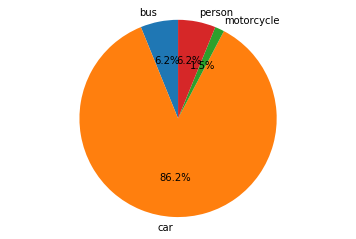

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

labels = detections_by_det_type_agg_size.index.tolist()
sizes = detections_by_det_type_agg_size.tolist()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

plt.show()

### Display Sample Image

To quickly display a specific image inline witin the notebook use an `IPython.display.Image` widget.

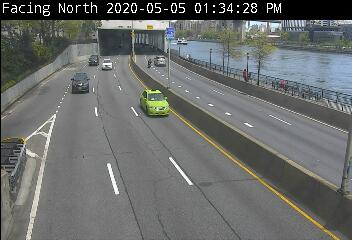

In [6]:
from IPython.display import Image 

sample_image_path = utils.resolve_repo_path("sample/733-681-N/2020/05/05/13/34/29/733-681-N--2020-05-05--13.34.29--original.jpeg")
img = Image(filename=sample_image_path)
img

### Run Detection Model

You can import scripts from the ``cctview`` module to run a preconfigured obect detection model on a specific image. See the module at [github.com/samdbrice/cctview/code](https://github.com/samdbrice/cctview/tree/master/code) for more info.

In [7]:
from cctview import detect

Using TensorFlow backend.
/opt/anaconda3/envs/cctview/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/envs/cctview/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/envs/cctview/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/envs/cctview/lib/python3.5

/opt/anaconda3/envs/cctview/lib/python3.5/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/envs/cctview/lib/python3.5/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/envs/cctview/lib/python3.5/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/envs/cctview/lib/python3.5/site


tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_1:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_2:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_3:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_4:0' shape=(9, 4) dtype=float32> anchors
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [8]:
sample_image_detections = detect.DETECTOR.detectObjectsFromImage(input_image=sample_image_path)
sample_image_detections

[{'box_points': [88, 54, 98, 65],
  'name': 'car',
  'percentage_probability': 55.879729986190796},
 {'box_points': [101, 57, 112, 70],
  'name': 'car',
  'percentage_probability': 64.23957347869873},
 {'box_points': [70, 72, 90, 93],
  'name': 'car',
  'percentage_probability': 84.6573531627655},
 {'box_points': [139, 88, 170, 117],
  'name': 'car',
  'percentage_probability': 68.60342025756836}]

You can use ``opencv`` along with the ``ImageAI`` object detection model results to extract additional from a target image. 

Such as croping out and displaying each object detection or drawing a box around a specific detection on the original image.

**Note:** ``ImageAI`` has object extraction built-in with the ``extract_detected_objects`` flag.

### Extract Detections using Box Points

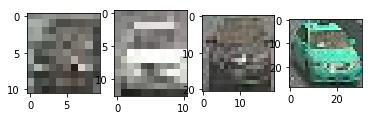

In [9]:
import cv2
from matplotlib import pyplot as plt

sample_image = cv2.imread(sample_image_path)

fig = plt.figure()

for i, sample_image_detection in enumerate(sample_image_detections):
    box_points = sample_image_detection.get('box_points')
    x1,y1,x2,y2 = box_points
    detection_image = sample_image[y1:y2, x1:x2]
    fig.add_subplot(1, len(sample_image_detections), i+1)
    plt.imshow(detection_image)
    
plt.show()
plt.close()

### Draw Box Around Detection

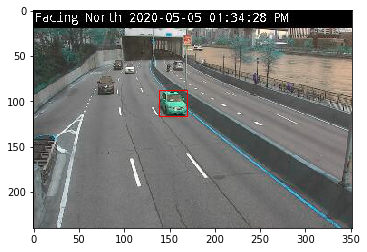

In [10]:
sample_image_detection = sample_image_detections[-1]
box_points = sample_image_detection.get('box_points')
x1,y1,x2,y2 = box_points
start_point=(x1,y1)
end_point=(x2,y2)
color=(255, 0, 0)
thickness=1

detection_image_with_box = cv2.rectangle(sample_image, 
                      start_point, 
                      end_point, 
                      color, 
                      thickness)

plt.imshow(detection_image_with_box)